# **_001 Exploratory Data Analysis_**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### **_Data Loading_**

In [2]:
try:
    os.chdir("../../ML_activity")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


In [3]:
df = pd.read_json('ML_activity/data/MLA_100k.jsonlines', lines=True)
df.head()

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


### **_Exploring the dataset_**

In [4]:
print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
print(df['condition'].value_counts())

Shape: (100000, 48)
Columnas: ['seller_address', 'warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids', 'base_price', 'shipping', 'non_mercado_pago_payment_methods', 'seller_id', 'variations', 'location', 'site_id', 'listing_type_id', 'price', 'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 'official_store_id', 'differential_pricing', 'accepts_mercadopago', 'original_price', 'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created', 'secure_thumbnail', 'stop_time', 'status', 'video_id', 'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time', 'permalink', 'geolocation', 'sold_quantity', 'available_quantity']
condition
new     53758
used    46242
Name: count, dtype: int64


### **_Standardizing data_**

Some columns contain nested dictionaries. This loop flattens those structures into new columns with compound names (e.g., `seller_address.city.name`).

In [5]:
df = df.copy()
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df_normalized = pd.json_normalize(df[col])
        df_normalized.columns = [f"{col}.{subcol}" for subcol in df_normalized.columns]
        df = df.drop(columns=[col]).join(df_normalized)

In [6]:
df.head()

,warranty,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,...,location.neighborhood.name,location.neighborhood.id,location.country.name,location.country.id,location.city.name,location.city.id,location.state.name,location.state.id,geolocation.latitude,geolocation.longitude
0,None,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.62807,-58.398671
1,NUESTRA REPUTACION,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.593552,-58.505917
2,None,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.623391,-58.414395
3,None,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.628189,-58.492921
4,MI REPUTACION.,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.634655,-58.549504


In [7]:
print(len(df.columns))
print("Columnas:", df.columns.tolist())

91
Columnas: ['warranty', 'sub_status', 'condition', 'deal_ids', 'base_price', 'non_mercado_pago_payment_methods', 'seller_id', 'variations', 'site_id', 'listing_type_id', 'price', 'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 'official_store_id', 'differential_pricing', 'accepts_mercadopago', 'original_price', 'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created', 'secure_thumbnail', 'stop_time', 'status', 'video_id', 'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time', 'permalink', 'sold_quantity', 'available_quantity', 'seller_address.comment', 'seller_address.longitude', 'seller_address.id', 'seller_address.address_line', 'seller_address.latitude', 'seller_address.zip_code', 'seller_address.country.name', 'seller_address.country.id', 'seller_address.search_location.neighborhood.name', 'seller_address.search_loc

This block extracts all unique non-MercadoPago payment methods and creates one-hot encoded binary columns for each.

In [8]:
methods = df['non_mercado_pago_payment_methods'].explode()
methods = methods.dropna().apply(lambda x: x['id'] if isinstance(x, dict) else None)
unique_methods = methods.dropna().unique()
for method in unique_methods:
    df[f'payment_{method}'] = df['non_mercado_pago_payment_methods'].apply(
        lambda x: int(any(m.get('id') == method for m in x)) if isinstance(x, list) else 0
    )
df.drop(columns='non_mercado_pago_payment_methods', inplace=True)

In [9]:
print(len(df.columns))
print("Columnas:", df.columns.tolist())

104
Columnas: ['warranty', 'sub_status', 'condition', 'deal_ids', 'base_price', 'seller_id', 'variations', 'site_id', 'listing_type_id', 'price', 'attributes', 'buying_mode', 'tags', 'listing_source', 'parent_item_id', 'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 'official_store_id', 'differential_pricing', 'accepts_mercadopago', 'original_price', 'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created', 'secure_thumbnail', 'stop_time', 'status', 'video_id', 'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time', 'permalink', 'sold_quantity', 'available_quantity', 'seller_address.comment', 'seller_address.longitude', 'seller_address.id', 'seller_address.address_line', 'seller_address.latitude', 'seller_address.zip_code', 'seller_address.country.name', 'seller_address.country.id', 'seller_address.search_location.neighborhood.name', 'seller_address.search_location.neighborhood.id', 'seller_add

In [10]:
df.isnull().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

warranty                                             60896
sub_status                                               0
condition                                                0
deal_ids                                                 0
base_price                                               0
seller_id                                                0
variations                                               0
site_id                                                  0
listing_type_id                                          0
price                                                    0
attributes                                               0
buying_mode                                              0
tags                                                     0
listing_source                                           0
parent_item_id                                       23011
coverage_areas                                           0
category_id                                             

Three large drop operations remove irrelevant, with more than 20% of nulls, nested and overly complex features that are either not useful for the prediction or hard to encode meaningfully for the model, also the features that refer to ids and those ids do not contribute to the training of the model.

In [11]:
df = df.drop(['warranty', 'sub_status', 'deal_ids', 'seller_id', 'site_id', 'attributes', 'tags', 'listing_source', 'parent_item_id', 
              'coverage_areas', 'category_id', 'descriptions', 'last_updated', 'international_delivery_mode', 'pictures', 'id', 
              'official_store_id', 'differential_pricing', 'currency_id', 'thumbnail', 'title', 'secure_thumbnail', 'stop_time', 'video_id', 
              'catalog_product_id', 'subtitle'], axis=1)

df.head()

,condition,base_price,variations,listing_type_id,price,buying_mode,accepts_mercadopago,original_price,automatic_relist,date_created,...,payment_MLAMC,payment_MLAMS,payment_MLAVE,payment_MLACD,payment_MLAVS,payment_MLADC,payment_MLAAM,payment_MLAWT,payment_MLAMP,payment_MLABC
0,new,80.0,[],bronze,80.0,buy_it_now,True,NaN,False,2015-09-05T20:42:53.000Z,...,0,0,0,0,0,0,0,0,0,0
1,used,2650.0,[],silver,2650.0,buy_it_now,True,NaN,False,2015-09-26T18:08:30.000Z,...,0,0,0,0,0,0,0,0,0,0
2,used,60.0,[],bronze,60.0,buy_it_now,True,NaN,False,2015-09-09T23:57:07.000Z,...,0,0,0,0,0,0,0,0,0,0
3,new,580.0,[],silver,580.0,buy_it_now,True,NaN,False,2015-09-28T18:47:56.000Z,...,0,0,0,0,0,0,0,0,0,0
4,used,30.0,[],bronze,30.0,buy_it_now,True,NaN,False,2015-08-24T22:07:20.000Z,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = df.drop(['variations', 'initial_quantity', 'start_time', 'permalink', 'seller_address.longitude', 'seller_address.id', 
              'seller_address.address_line', 'seller_address.latitude', 'seller_address.zip_code', 'seller_address.country.name', 
              'seller_address.country.id', 'seller_address.search_location.neighborhood.name', 'seller_address.search_location.neighborhood.id', 
              'seller_address.search_location.state.name', 'seller_address.search_location.state.id', 'seller_address.search_location.city.name', 
              'seller_address.search_location.city.id', 'seller_address.city.id', 'seller_address.state.name', 'seller_address.state.id', 
              'seller_contact.area_code2', 'seller_contact.phone2', 'seller_contact.webpage', 'seller_contact.email', 'seller_contact.contact', 
              'seller_contact.area_code', 'seller_contact.other_info', 'seller_contact.phone',], axis=1)

In [13]:
df = df.drop(['seller_address.comment', 'shipping.methods', 'shipping.tags', 'shipping.dimensions', 'shipping.free_methods', 
              'location.open_hours', 'location.longitude', 'location.address_line', 'location.latitude', 'location.zip_code',
              'location.neighborhood.name', 'location.neighborhood.name', 'location.neighborhood.id', 'location.country.name', 
              'location.country.id', 'location.city.id', 'location.state.name', 'location.state.id', 'geolocation.latitude', 
              'geolocation.longitude', 'payment_MLATB', 'payment_MLAWC', 'payment_MLAMO', 'payment_MLAOT', 'payment_MLAMC', 
              'payment_MLAMS', 'payment_MLAVE', 'payment_MLACD', 'payment_MLAVS', 'payment_MLADC', 'payment_MLAAM', 'payment_MLAWT', 
              'payment_MLAMP', 'payment_MLABC'], axis=1)

In [14]:
print(len(df.columns))
print("Columnas:", df.columns.tolist())

17
Columnas: ['condition', 'base_price', 'listing_type_id', 'price', 'buying_mode', 'accepts_mercadopago', 'original_price', 'automatic_relist', 'date_created', 'status', 'sold_quantity', 'available_quantity', 'seller_address.city.name', 'shipping.local_pick_up', 'shipping.free_shipping', 'shipping.mode', 'location.city.name']


In [15]:
df.head()

,condition,base_price,listing_type_id,price,buying_mode,accepts_mercadopago,original_price,automatic_relist,date_created,status,sold_quantity,available_quantity,seller_address.city.name,shipping.local_pick_up,shipping.free_shipping,shipping.mode,location.city.name
0,new,80.0,bronze,80.0,buy_it_now,True,NaN,False,2015-09-05T20:42:53.000Z,active,0,1,San Cristóbal,True,False,not_specified,NaN
1,used,2650.0,silver,2650.0,buy_it_now,True,NaN,False,2015-09-26T18:08:30.000Z,active,0,1,Buenos Aires,True,False,me2,NaN
2,used,60.0,bronze,60.0,buy_it_now,True,NaN,False,2015-09-09T23:57:07.000Z,active,0,1,Boedo,True,False,me2,NaN
3,new,580.0,silver,580.0,buy_it_now,True,NaN,False,2015-09-28T18:47:56.000Z,active,0,1,Floresta,True,False,me2,NaN
4,used,30.0,bronze,30.0,buy_it_now,True,NaN,False,2015-08-24T22:07:20.000Z,active,0,1,Tres de febrero,True,False,not_specified,NaN


Now, with fewer columns to work with, the null values are checked. From this review, it is concluded that the columns with excessive missing data are going to be deleted.

In [16]:
print(df.isnull().sum())

condition                       0
base_price                      0
listing_type_id                 0
price                           0
buying_mode                     0
accepts_mercadopago             0
original_price              99857
automatic_relist                0
date_created                    0
status                          0
sold_quantity                   0
available_quantity              0
seller_address.city.name        0
shipping.local_pick_up          0
shipping.free_shipping          0
shipping.mode                   0
location.city.name          97781
dtype: int64


In [17]:
df = df.drop(['original_price', 'location.city.name', 'date_created', 'base_price'], axis=1)

In [18]:
print(df.isnull().sum())

condition                   0
listing_type_id             0
price                       0
buying_mode                 0
accepts_mercadopago         0
automatic_relist            0
status                      0
sold_quantity               0
available_quantity          0
seller_address.city.name    0
shipping.local_pick_up      0
shipping.free_shipping      0
shipping.mode               0
dtype: int64


Renames nested columns into simplified names for easier referencing.

In [19]:
df = df.rename(columns={'seller_address.city.name': 'seller_city', 'shipping.local_pick_up': 'local_pick_up',
                         'shipping.free_shipping':'free_shipping', 'shipping.mode':'shipping_mode'})

df.head()

,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,sold_quantity,available_quantity,seller_city,local_pick_up,free_shipping,shipping_mode
0,new,bronze,80.0,buy_it_now,True,False,active,0,1,San Cristóbal,True,False,not_specified
1,used,silver,2650.0,buy_it_now,True,False,active,0,1,Buenos Aires,True,False,me2
2,used,bronze,60.0,buy_it_now,True,False,active,0,1,Boedo,True,False,me2
3,new,silver,580.0,buy_it_now,True,False,active,0,1,Floresta,True,False,me2
4,used,bronze,30.0,buy_it_now,True,False,active,0,1,Tres de febrero,True,False,not_specified


The distribution of the values in `accepts_mercadopago` was reviewed and because there is a notable disproportion in the data, it was decided not to use this column, since it could negatively affect the training of the model.

In [25]:
print(df['accepts_mercadopago'].value_counts())

accepts_mercadopago
True     97781
False     2219
Name: count, dtype: int64


In [26]:
df = df.drop(['accepts_mercadopago'], axis=1)

The presence of duplicates was identified and it was decided to keep them since they were not exactly the same.

In [20]:
print(df.duplicated().sum())

21972


In [21]:
df[df.duplicated(keep=False)]

,condition,listing_type_id,price,buying_mode,accepts_mercadopago,automatic_relist,status,sold_quantity,available_quantity,seller_city,local_pick_up,free_shipping,shipping_mode
2,used,bronze,60.00,buy_it_now,True,False,active,0,1,Boedo,True,False,me2
4,used,bronze,30.00,buy_it_now,True,False,active,0,1,Tres de febrero,True,False,not_specified
7,used,free,150.00,buy_it_now,True,False,active,0,1,Avellaneda/Capital Federal,False,False,not_specified
8,new,gold_special,2352.00,buy_it_now,True,True,paused,0,10,Capital Federal,True,True,me2
21,new,bronze,190.00,buy_it_now,True,False,active,0,1,Flores,True,False,me2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,new,bronze,1604.99,buy_it_now,True,False,active,0,3,Mataderos,True,False,me2
99984,new,bronze,250.00,buy_it_now,True,False,active,0,1,Capital Federal,True,False,me2
99986,used,bronze,100.00,buy_it_now,True,False,active,0,1,C.A.B.A.,True,False,not_specified
99998,used,bronze,50.00,buy_it_now,True,False,active,0,1,Balvanera,True,False,me2


Visualizes the distribution of the target variable (`condition`), which indicates whether a product is **new** or **used**.

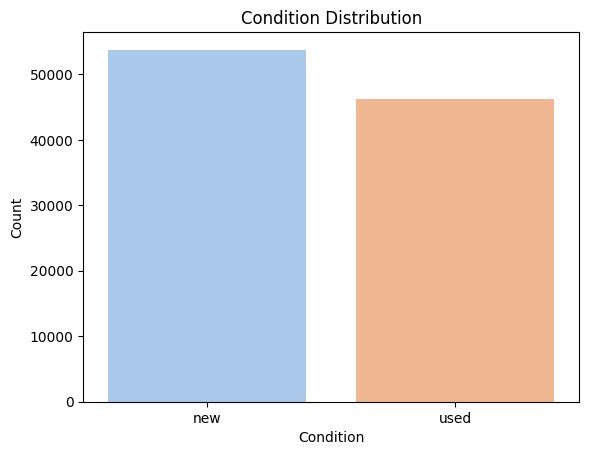

In [22]:
plot = sns.countplot(x='condition', hue='condition', data=df, palette='pastel', legend=False)
plt.title('Condition Distribution')
plt.ylabel('Count')
plot.set_xlabel("Condition")
plt.show()

In this part the values of the `condition` variable are changed to: 
- 1 for new
- 0 for used

In [27]:
df['condition'] = df['condition'].replace({'new': 1, 'used': 0})
df.head()

C:\Users\natym\AppData\Local\Temp\ipykernel_9044\4090419734.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition'] = df['condition'].replace({'new': 1, 'used': 0})


,condition,listing_type_id,price,buying_mode,automatic_relist,status,sold_quantity,available_quantity,seller_city,local_pick_up,free_shipping,shipping_mode
0,1,bronze,80.0,buy_it_now,False,active,0,1,San Cristóbal,True,False,not_specified
1,0,silver,2650.0,buy_it_now,False,active,0,1,Buenos Aires,True,False,me2
2,0,bronze,60.0,buy_it_now,False,active,0,1,Boedo,True,False,me2
3,1,silver,580.0,buy_it_now,False,active,0,1,Floresta,True,False,me2
4,0,bronze,30.0,buy_it_now,False,active,0,1,Tres de febrero,True,False,not_specified


In [30]:
df.drop(columns=['seller_city'], inplace=True)

In [31]:
df.to_csv('ML_activity/data/MLA_100k_cleaned.csv', index=False)